In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as linear_model

plt.rcParams.update({'font.size':18})

In [5]:
df141_new = pd.read_csv('141precision-ieDRC.csv')
# df188_new = pd.read_csv('188precision.csv')
# df197_new = pd.read_csv('197precision.csv')
# df211_new = pd.read_csv('211precision.csv')

<Axes: >

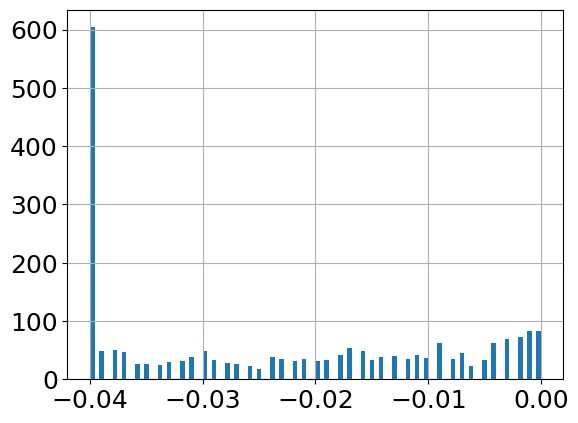

In [6]:
df141_new.dt.hist(bins=100)

In [7]:
df141_new[df141_new.dt==-0.04].shape

(604, 17)

Unnamed: 0                                                         386
id                                                                 386
depth                                                            240.0
relative_depth                                                    70.0
aic_t                [18037.326111944443, 18037.326111944443, 18037...
aics                 [-3401.264620567428, -3447.155183634548, -3459...
aic_maxes                                [498, 498, 200, 69, 240, 498]
first_hydrophone                                                     3
second_hydrophone                                                    2
arrival_time                                              18037.326107
first_arrival                         2019-05-21 07:49:35.643000+00:00
second_arrival                        2019-05-21 07:49:35.774000+00:00
dt                                                               -0.04
max_amp                                                       0.630192
cum_am

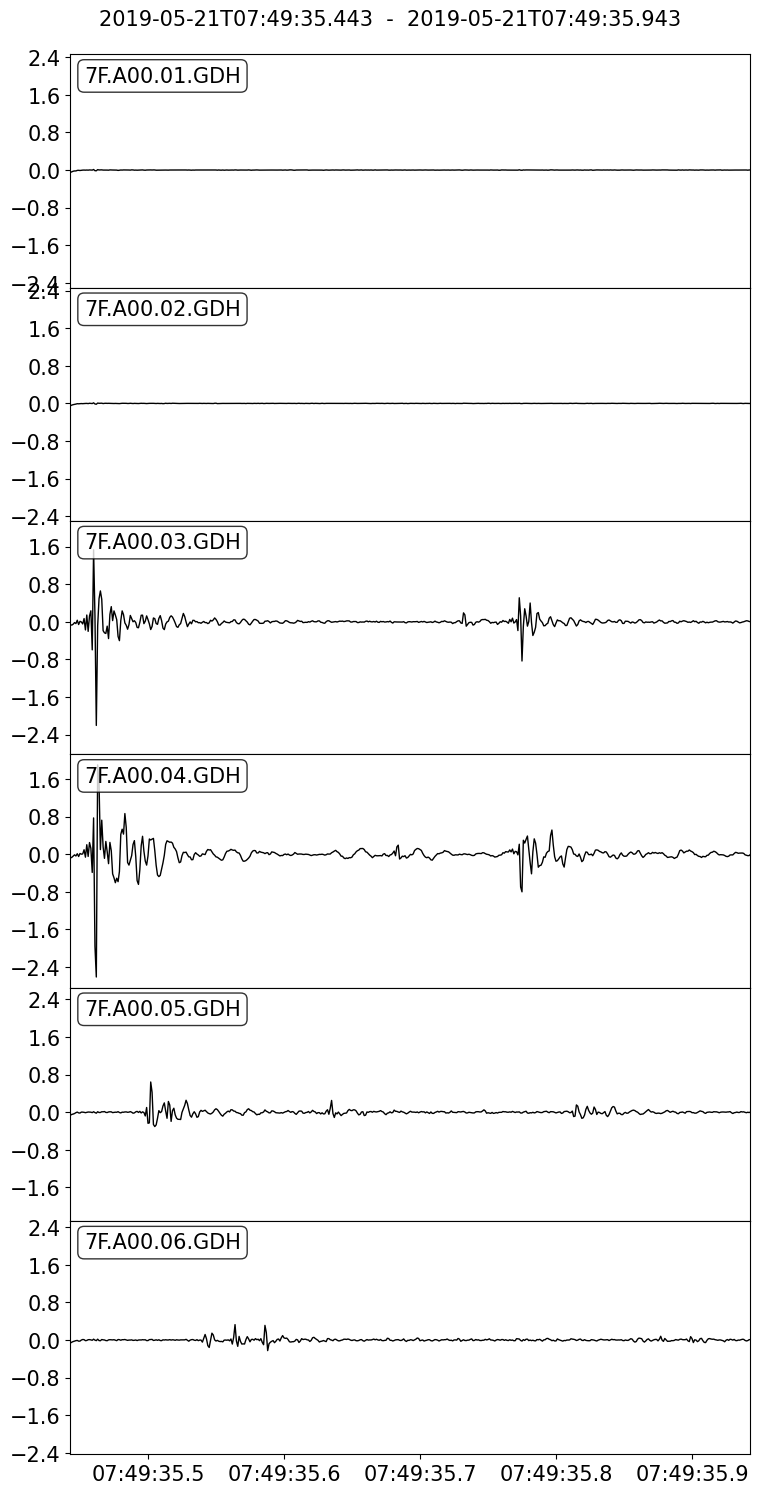

[10, 12, 499, 12, 57, 99]
[0 1 3 4 5 2]


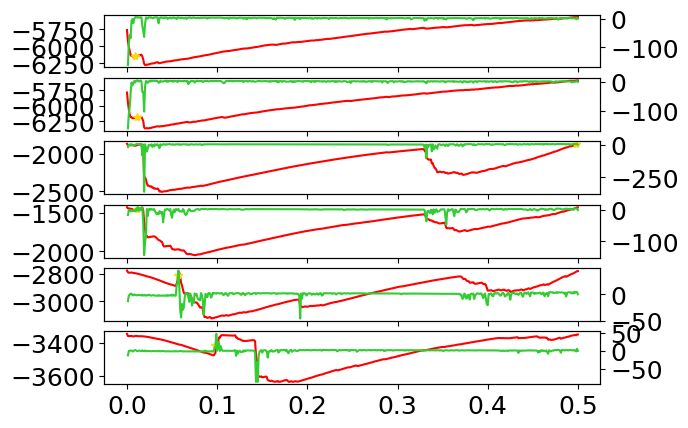

In [10]:
from Event import Event
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import obspy.signal.trigger as trigger

emeta = df141_new[df141_new.dt==-0.04].iloc[159]
print(emeta)
starttime = emeta.arrival_time
first_hydrophone = emeta.first_arrival
day_number = 141
paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=day_number)
waveforms = load.import_corrected_data_for_single_day(paths=paths) 

e = Event(
    id=id
    ,starttime=starttime
    ,init_first_hphone=first_hydrophone
    ,waveforms=waveforms
    ,hanning=False
    )

st = e.stream.copy()
st.filter(type='highpass', freq=50, corners=1, zerophase=True)
fig = st.plot()

fig, ax = plt.subplots(6, 1)

tmaxes = []

for i in np.arange(0, 6, 1):
    t = st[i].times()
    aics = trigger.aic_simple(st[i].data)
    ax[i].plot(t, aics, color='red')
    ax2 = ax[i].twinx()
    ax2.plot(t[1:], np.diff(aics), color='limegreen')
    tmax = np.argmax(np.diff(aics))
    ax[i].plot(tmax/1000, aics[tmax+1], marker='*', color='gold', zorder=50)
    # ax2.plot(tmax, np.diff(aics)[tmax], marker='*', color='gold')
    tmaxes.append(tmax+1)

print(tmaxes)
print(np.argsort(tmaxes))

In [52]:
t

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

In [18]:
def filter_events(df):
    dt_lim = -0.04
    amplim = 0.00
    data = df.copy()
    data = data[data.dt > dt_lim]
    data = data[data.max_amp > amplim]
    print('number of events removed:', df.shape[0] - data.shape[0])
    print('% of events removed:', 1 - data.shape[0]/df.shape[0])
    return data

In [19]:
df141 = filter_events(df141_new)
df188 = filter_events(df188_new)
df197 = filter_events(df197_new)
df211 = filter_events(df211_new)

number of events removed: 610
% of events removed: 0.27219991075412764
number of events removed: 1429
% of events removed: 0.49600833044081916
number of events removed: 458
% of events removed: 0.4341232227488152
number of events removed: 88
% of events removed: 0.27076923076923076


In [14]:
def get_yt(df):
    t = pd.to_datetime(df.origin_time).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values
    y = df.depth.values
    return y, t

def plot_events(df, ax):
    # df = filter_events(df)
    y, t = get_yt(df)
    print('number of events:', df.shape)
    ax.scatter(t, y, marker='.', s=df.max_amp.values*10, c='purple', alpha=0.3)

number of events: (2241, 17)
number of events: (2881, 17)
number of events: (1055, 17)
number of events: (325, 17)


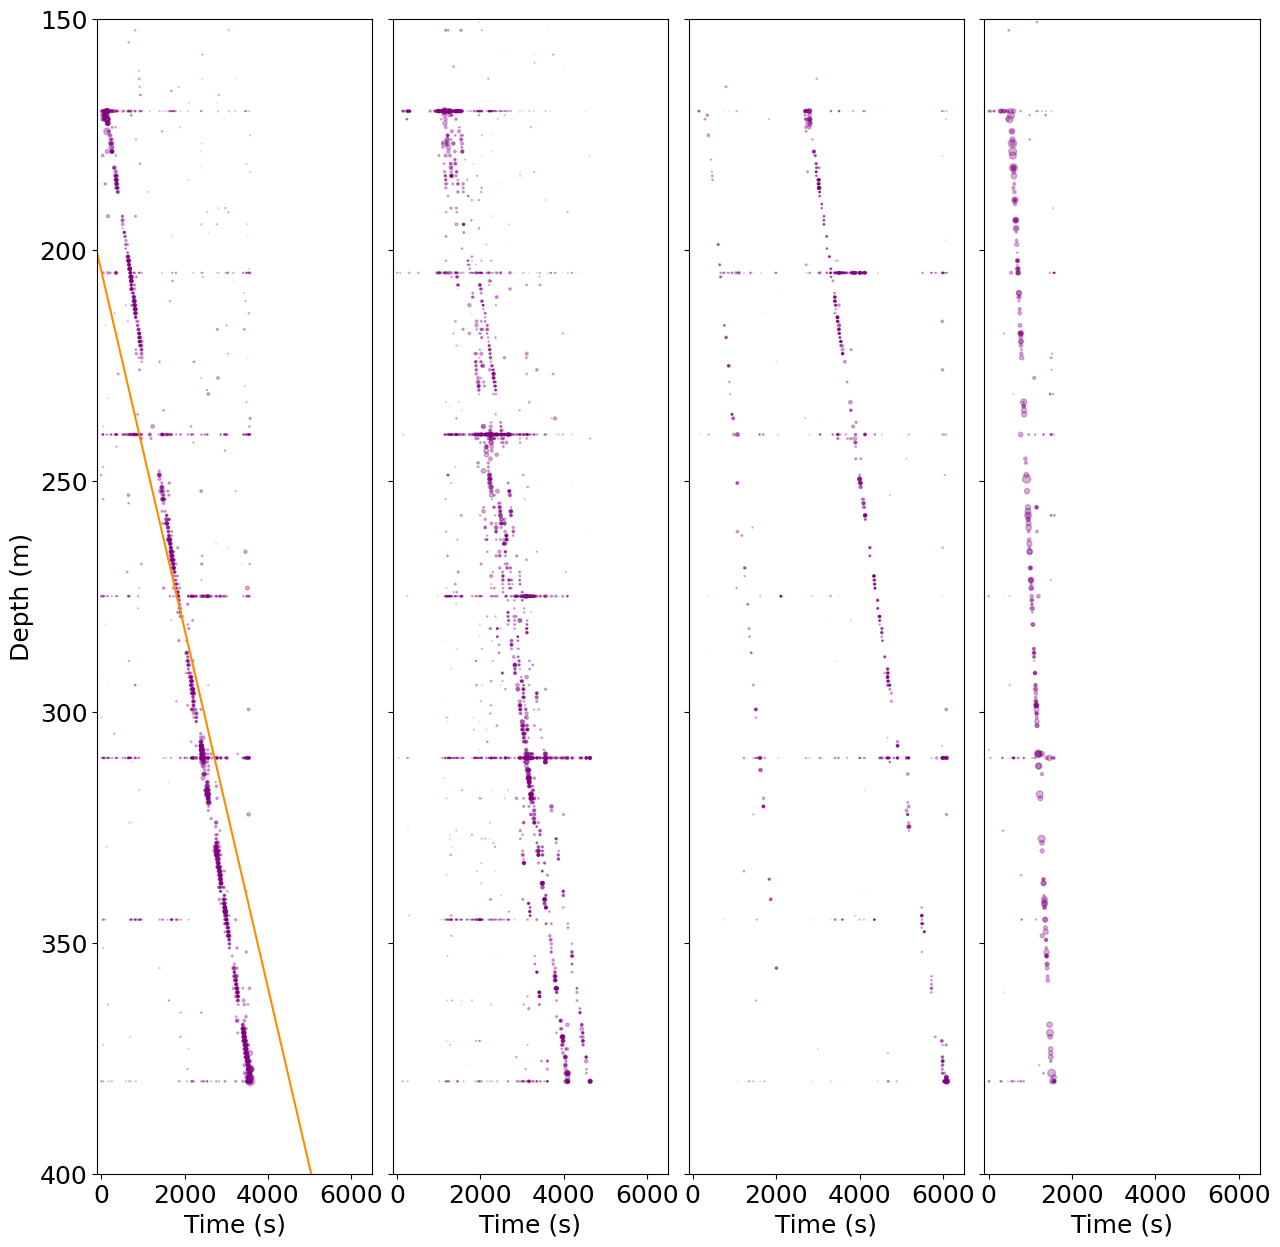

In [15]:
fig, ax = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 15))

ax[0].set_ylim(400, 150)
ax[0].set_xlim(-100, 6500)
ax[0].set_xticks(np.arange(0, 6500, 2000))
ax[0].set_ylabel('Depth (m)')
for a in ax:
    a.set_xlabel('Time (s)')
fig.subplots_adjust(wspace=0.075)

plot_events(df141_new, ax[0])
plot_events(df188_new, ax[1])
plot_events(df197_new, ax[2])
plot_events(df211_new, ax[3])

def fitline(df):
    # df = filter_events(df)
    y, t = get_yt(df)
    lr = linear_model.LinearRegression()
    lr.fit(t.reshape(-1,1), y.reshape(-1,1))
    return lr.intercept_, lr.coef_

def plot_fitline(df, ax):
    beta_0, beta_1 = fitline(df)
    x = np.linspace(-100, 6000, 1000)
    y = beta_0[0] + beta_1[0][0] * x
    ax.plot(x, y, color='darkorange')

# fitline(df141_new)
plot_fitline(df141_new, ax[0])

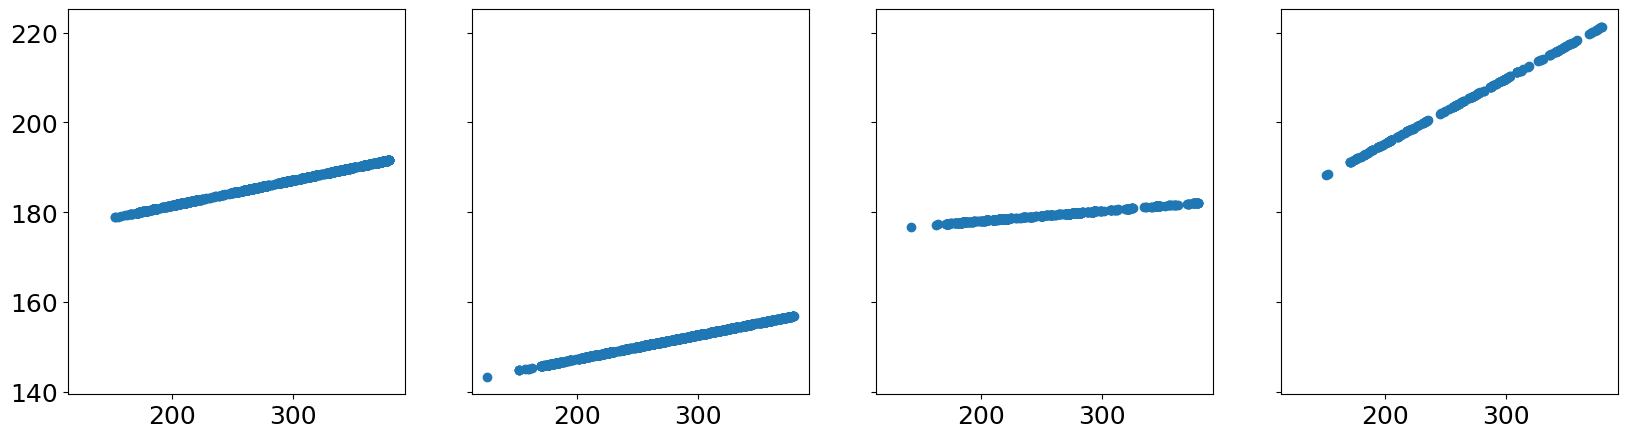